## Classification using Tensorflow

Convolutional Neural Networks are the best thing around for images now, let's use them and compare to before 

Digits have 10 possible categories 

I'm not spending much time trying to decide on the number of layers and units - I could use validation sets to try picking better ones but I just want to demonstrate to you some of the features of the library

So the targets are the numbers 
0,1,2,3,4,5,6,7,8,9 - 10 possible classes

In [2]:
# Importing TensorFlow library for machine learning tasks
import tensorflow as tf

# Importing essential libraries for numerical operations, plotting, and dataset splitting
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing

# Importing Keras layers for building neural network models
from tensorflow.keras import layers

# Handling the absence of the 'resource' module on Windows systems
import sys
if sys.platform == "win32":  # Check if the platform is Windows
    import os
    sys.modules['resource'] = os  # Map 'resource' to 'os' to bypass module issues

# Importing TensorFlow Datasets for loading and working with ready-to-use datasets
import tensorflow_datasets as tfds


Load in the dataset (handwritten numbers 0-9) (https://www.tensorflow.org/datasets/catalog/mnist)

It's already provided split to test and train sets.

In [ ]:
mnist = tf.keras.datasets.mnist  # Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  # Split into training and testing sets
test_images.shape  # Output the shape of the test images

(10000, 28, 28)

I want each image as a 28x28x1 so that it's a 3d "volume"

The code reshapes the test_images array to include an additional dimension for the (greyscale) channel, which is necessary for many deep learning models that expect a 4D input tensor.

>This format is essential because many deep learning frameworks and models expect input in the form (batch_size, height, width, channels) for consistency, even if there is only one channel.

In [22]:
# add channels array to the test sample
test_images = test_images.reshape(
    test_images.shape[0],  # Number of test images (10,000)
    test_images.shape[1],  # Height of each image (28)
    test_images.shape[2],  # Width of each image (28)
    1  # Add a single channel (grayscale)
)
test_images.shape


(10000, 28, 28, 1)

In [5]:
# add channels array to the train sample too
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)
train_images.shape

(60000, 28, 28, 1)

We're not going to use train_test_split as tf.keras has already divided the images for us

In [6]:
np.max(train_images)

255

8-bit images too, the values go from 0-255.

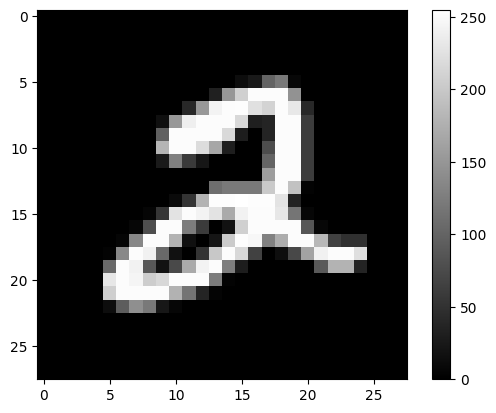

2


In [7]:
plt.figure()
plt.imshow(train_images[5], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()
print(train_labels[5])

matplotlib works fine with the values from 0-255 or from 0-1 for grayscale. 

I want to convert them all between 0-1 (I could have done this in the previous example but I'm doing it now)

0-1 tends to work better. I am <b>not</b> using StandardScaler, I am just dividing by 255 as before

We should build this into the model. The below will give us a new layer we can use

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
img_height = train_images[0].shape[0]
img_width = train_images[0].shape[1]
print("Height: ", img_height, ", Width: ", img_width)

Height:  28 , Width:  28


In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(img_height, img_width, 1)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(12, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 12)     │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,650 (92.38 KB)

 Trainable params: 23,650 (92.38 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8497 - loss: 0.5481 - val_accuracy: 0.9693 - val_loss: 0.1156
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9681 - loss: 0.1094 - val_accuracy: 0.9758 - val_loss: 0.0885
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9775 - loss: 0.0786 - val_accuracy: 0.9757 - val_loss: 0.0817
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9807 - loss: 0.0651 - val_accuracy: 0.9789 - val_loss: 0.0726
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9843 - loss: 0.0530 - val_accuracy: 0.9785 - val_loss: 0.0720
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9851 - loss: 0.0504 - val_accuracy: 0.9810 - val_loss: 0.0687
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0421 - val_accuracy: 0.9794 - val_loss: 0.0701
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9881 - loss: 0.0409 - 

This should be higher than the previously fully connected ANN.

We could get training accuracy up further with more epochs, but that might be overfitting, let's analyse this first though.

In [13]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    try:
        plt.plot(history.history['val_loss'], label='val_loss')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

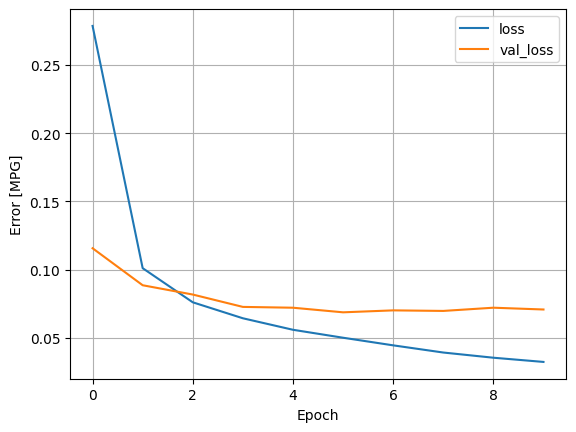

In [14]:
plot_loss(history)

The plot is diverging between val_loss and loss so might be some overfitting here, maybe should have used early stopping or chosen different hyperparameters

In [15]:
model.evaluate(test_images, test_labels, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9745 - loss: 0.0777


{'accuracy': 0.9794999957084656, 'loss': 0.06504659354686737}

0.9717 was the score for the previous fully dense. So an improvement alright, but this is an extremely basic CNN, and the images were greyscale, CNN would do much much better with RGB than dense networks

### Early stopping
Using patience=3 to see if no improvement after 3 steps

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(img_height, img_width, 1)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(12, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[callback])   ##Adding my early stopping here

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8527 - loss: 0.5527 - val_accuracy: 0.9619 - val_loss: 0.1447
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9653 - loss: 0.1217 - val_accuracy: 0.9737 - val_loss: 0.0914
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9761 - loss: 0.0809 - val_accuracy: 0.9757 - val_loss: 0.0825
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9810 - loss: 0.0636 - val_accuracy: 0.9774 - val_loss: 0.0740
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9837 - loss: 0.0569 - val_accuracy: 0.9780 - val_loss: 0.0737
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9855 - loss: 0.0504 - val_accuracy: 0.9778 - val_loss: 0.0765
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9875 - loss: 0.0436 - val_accuracy: 0.9762 - val_loss: 0.0785
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9889 - loss: 0

Patience of 3 might be too little

In [19]:
model.evaluate(test_images,test_labels, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9741 - loss: 0.0798


{'accuracy': 0.9794999957084656, 'loss': 0.06619557738304138}

## Problem with early stopping and patience

With patience set to 3, we don't actually get the "best" model, the one with the lowest validation loss, we get the model 3 epochs after the best one!

So we can use another callback to save the "best" model if we want. 

`ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)`

will do this

In [20]:
callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [29]:
'''callback_modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, save_format='h5')'''

"callback_modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, save_format='h5')"

In [ ]:
# save best model

callback_modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',  # Correct extension for the full model
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False  # Indicates the full model is saved
)

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(img_height, img_width, 1)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(12, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[callback_earlystop, callback_modelcheckpoint])

Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3515 - accuracy: 0.9004 - val_loss: 0.1903 - val_accuracy: 0.9469
Epoch 2/100
  17/1500 [..............................] - ETA: 9s - loss: 0.2641 - accuracy: 0.9228

C:\Users\BMcGinley\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 11s 7ms/step - loss: 0.1540 - accuracy: 0.9561 - val_loss: 0.1132 - val_accuracy: 0.9697
Epoch 3/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0970 - accuracy: 0.9725 - val_loss: 0.0926 - val_accuracy: 0.9743
Epoch 4/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0752 - accuracy: 0.9780 - val_loss: 0.0848 - val_accuracy: 0.9747
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0627 - accuracy: 0.9814 - val_loss: 0.0835 - val_accuracy: 0.9748
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0541 - accuracy: 0.9845 - val_loss: 0.0699 - val_accuracy: 0.9799
Epoch 7/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0694 - val_accuracy: 0.9797
Epoch 8/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0689 - val_accuracy

In [24]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

In [25]:
model.evaluate(test_images,test_labels, return_dict=True)

313/313 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9812


{'loss': 0.06165913864970207, 'accuracy': 0.9811999797821045}

In [26]:
saved_model.evaluate(test_images,test_labels, return_dict=True)

313/313 [==============================] - 1s 4ms/step - loss: 0.0614 - accuracy: 0.9804


{'loss': 0.06136053428053856, 'accuracy': 0.980400025844574}

## Now let's do a "deeper" model"

In [27]:
num_classes = 10

In [28]:
model2 = tf.keras.models.Sequential([
  tf.keras.Input(shape=(img_height, img_width, 1)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)         

In [29]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model2.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[callback_earlystop, callback_modelcheckpoint])

Epoch 1/100
1500/1500 [==============================] - 21s 13ms/step - loss: 0.1847 - accuracy: 0.9419 - val_loss: 0.0906 - val_accuracy: 0.9724
Epoch 2/100
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.0571 - val_accuracy: 0.9829
Epoch 3/100
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0374 - accuracy: 0.9878 - val_loss: 0.0443 - val_accuracy: 0.9864
Epoch 4/100
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0308 - accuracy: 0.9895 - val_loss: 0.0426 - val_accuracy: 0.9871
Epoch 5/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0421 - val_accuracy: 0.9868
Epoch 6/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 7/100
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0

In [31]:
saved_model2 = load_model('best_model.h5')

In [32]:
saved_model2.evaluate(test_images,test_labels, return_dict=True)

313/313 [==============================] - 2s 5ms/step - loss: 0.0359 - accuracy: 0.9901


{'loss': 0.035920776426792145, 'accuracy': 0.9901000261306763}

In [33]:
model2.evaluate(test_images,test_labels, return_dict=True)

313/313 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9853


{'loss': 0.04952801391482353, 'accuracy': 0.9853000044822693}

Over 99% accuracy on the test set. That's quite good! Although, take note that just because a network is deeper and more complicated does not mean it will perform better. How deep a network is etc is a hyperparameter so it can make the model better or worse like all hyperparameters

You may notice that the number of parameters is less than the dense network done previously